Weighted Pre-Treatment Speed: 16.91 mph
Weighted Post-Treatment Speed: 16.05 mph
T-Statistic: 27.259, P-Value: 0.000


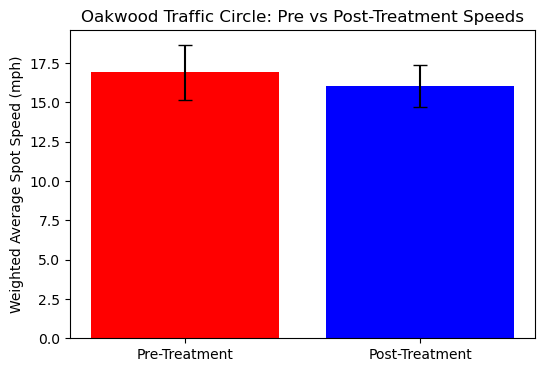

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

pre_treatment = pd.read_csv('data/Cimarron_pre.csv')
post_treatment = pd.read_csv('data/Cimarron_post.csv')
filters = (pre_treatment['Day Type'] == '0: All Days (M-Su)') | (pre_treatment['Day Part'] == '0: All Day (12am-12am)')
pre_treatment = pre_treatment[~filters]
filters = (post_treatment['Day Type'] == '0: All Days (M-Su)') | (post_treatment['Day Part'] == '0: All Day (12am-12am)')
post_treatment = post_treatment[~filters]

pre_speeds = pre_treatment['Avg Spot Speed (mph)']
post_speeds = post_treatment['Avg Spot Speed (mph)']
pre_volume = pre_treatment['Average Daily Spot Traffic (StL Volume)']
post_volume = post_treatment['Average Daily Spot Traffic (StL Volume)']

pre_weighted_speed = (pre_speeds * pre_volume).sum() / pre_volume.sum()
post_weighted_speed = (post_speeds * post_volume).sum() / post_volume.sum()

def weighted_std(values, weights):
    """Compute the weighted standard deviation."""
    mean = (values * weights).sum() / weights.sum()
    variance = (weights * (values - mean) ** 2).sum() / weights.sum()
    return variance ** 0.5

pre_weighted_std = weighted_std(pre_speeds, pre_volume)
post_weighted_std = weighted_std(post_speeds, post_volume)

valid_indices = pre_speeds.notna() & post_speeds.notna()
t_stat, p_value = stats.ttest_rel(pre_speeds[valid_indices], post_speeds[valid_indices])

print(f"Weighted Pre-Treatment Speed: {pre_weighted_speed:.2f} mph")
print(f"Weighted Post-Treatment Speed: {post_weighted_speed:.2f} mph")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

bar_colors = ['red', 'blue']
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_std, post_weighted_std], capsize=5, color=bar_colors)

plt.ylabel('Weighted Average Spot Speed (mph)')
plt.title('Oakwood Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()

In [2]:
top_speed = post_treatment.sort_values('85th Speed Percentile', ascending = False).head(10)
top_speed

,Data Periods,Mode of Travel,Zone ID,Zone Name,Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,Day Part,Average Daily Spot Traffic (StL Volume),Avg Spot Speed (mph),Free Flow Speed (mph),Free Flow Factor,5th Speed Percentile,15th Speed Percentile,85th Speed Percentile,95th Speed Percentile
181,"Jun 01, 2023 - Jun 01, 2024",All Vehicles - StL All Vehicles Volume,NaN,East 29th Street,yes,270,yes,2023-09,6: Saturday (Sa-Sa),1: Early AM (12am-6am),28,22.0,22.970,0.951,16.0,18.0,31.0,36.0
1603,"Jun 01, 2023 - Jun 01, 2024",All Vehicles - StL All Vehicles Volume,NaN,South Cimarron Street,yes,180,yes,2024-03,3: Wednesday (W-W),1: Early AM (12am-6am),24,17.0,20.771,0.819,9.0,12.0,28.0,30.0
799,"Jun 01, 2023 - Jun 01, 2024",All Vehicles - StL All Vehicles Volume,NaN,North Cimarron Street,yes,180,yes,2023-10,5: Friday (F-F),1: Early AM (12am-6am),25,19.0,21.105,0.912,14.0,14.0,28.0,28.0
1813,"Jun 01, 2023 - Jun 01, 2024",All Vehicles - StL All Vehicles Volume,NaN,West 29th Street,yes,270,yes,2023-07,6: Saturday (Sa-Sa),1: Early AM (12am-6am),32,19.0,22.000,0.856,17.0,17.0,28.0,32.0
1027,"Jun 01, 2023 - Jun 01, 2024",All Vehicles - StL All Vehicles Volume,NaN,North Cimarron Street,yes,180,yes,2024-03,3: Wednesday (W-W),1: Early AM (12am-6am),33,16.0,19.483,0.830,3.0,13.0,28.0,29.0
775,"Jun 01, 2023 - Jun 01, 2024",All Vehicles - StL All Vehicles Volume,NaN,North Cimarron Street,yes,180,yes,2023-10,1: Monday (M-M),1: Early AM (12am-6am),28,17.0,21.105,0.829,6.0,14.0,28.0,30.0
236,"Jun 01, 2023 - Jun 01, 2024",All Vehicles - StL All Vehicles Volume,NaN,East 29th Street,yes,270,yes,2023-10,7: Sunday (Su-Su),2: Peak AM (6am-10am),32,18.0,21.274,0.850,8.0,17.0,27.0,27.0
1069,"Jun 01, 2023 - Jun 01, 2024",All Vehicles - StL All Vehicles Volume,NaN,North Cimarron Street,yes,180,yes,2024-04,2: Tuesday (Tu-Tu),1: Early AM (12am-6am),22,15.0,23.021,0.647,3.0,6.0,27.0,28.0
727,"Jun 01, 2023 - Jun 01, 2024",All Vehicles - StL All Vehicles Volume,NaN,North Cimarron Street,yes,180,yes,2023-09,1: Monday (M-M),1: Early AM (12am-6am),32,19.0,20.887,0.913,12.0,12.0,27.0,29.0
2263,"Jun 01, 2023 - Jun 01, 2024",All Vehicles - StL All Vehicles Volume,NaN,West 29th Street,yes,270,yes,2024-05,1: Monday (M-M),1: Early AM (12am-6am),28,18.0,21.984,0.813,8.0,14.0,26.0,26.0


In [3]:
top_speed = pre_treatment.sort_values('95th Speed Percentile', ascending = False).head(10)
top_speed

,Data Periods,Mode of Travel,Zone ID,Zone Name,Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,Day Part,Average Daily Spot Traffic (StL Volume),Avg Spot Speed (mph),Free Flow Speed (mph),Free Flow Factor,5th Speed Percentile,15th Speed Percentile,85th Speed Percentile,95th Speed Percentile
1766,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,West 29th Street,yes,270,yes,2021-06,6: Saturday (Sa-Sa),2: Peak AM (6am-10am),66,21.0,24.387,0.858,12.0,14.0,24.0,68.0
527,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,East 29th Street,yes,270,yes,2022-04,7: Sunday (Su-Su),5: Late PM (7pm-12am),67,19.0,22.261,0.859,6.0,14.0,26.0,59.0
71,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,East 29th Street,yes,270,yes,2021-07,3: Wednesday (W-W),5: Late PM (7pm-12am),82,22.0,28.133,0.772,13.0,18.0,26.0,52.0
955,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Cimarron Street,yes,180,yes,2022-01,7: Sunday (Su-Su),1: Early AM (12am-6am),33,17.0,37.251,0.465,12.0,13.0,23.0,39.0
17,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,East 29th Street,yes,270,yes,2021-06,2: Tuesday (Tu-Tu),5: Late PM (7pm-12am),74,20.0,31.858,0.629,3.0,13.0,25.0,38.0
1111,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Cimarron Street,yes,180,yes,2022-05,1: Monday (M-M),1: Early AM (12am-6am),41,20.0,25.526,0.773,13.0,14.0,23.0,35.0
573,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,East 29th Street,yes,270,yes,2022-05,7: Sunday (Su-Su),3: Mid-Day (10am-3pm),94,20.0,23.463,0.866,5.0,12.0,25.0,34.0
1471,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Cimarron Street,yes,180,yes,2021-12,5: Friday (F-F),1: Early AM (12am-6am),33,18.0,21.943,0.826,14.0,14.0,25.0,33.0
895,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Cimarron Street,yes,180,yes,2021-12,5: Friday (F-F),1: Early AM (12am-6am),46,18.0,22.446,0.813,4.0,14.0,31.0,33.0
1867,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,West 29th Street,yes,270,yes,2021-08,7: Sunday (Su-Su),1: Early AM (12am-6am),38,16.0,23.493,0.696,4.0,6.0,23.0,33.0


Weighted Pre-Treatment Speed: 16.91 mph
Weighted Post-Treatment Speed: 16.05 mph
T-Statistic: 27.259, P-Value: 0.000


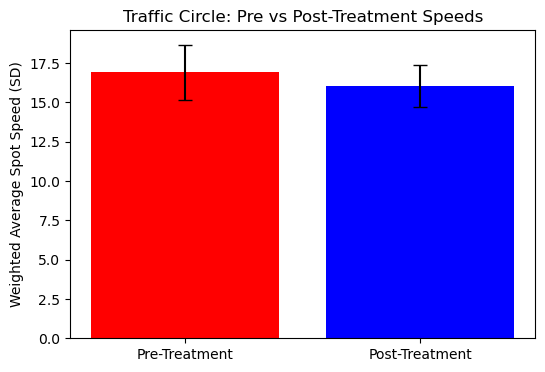

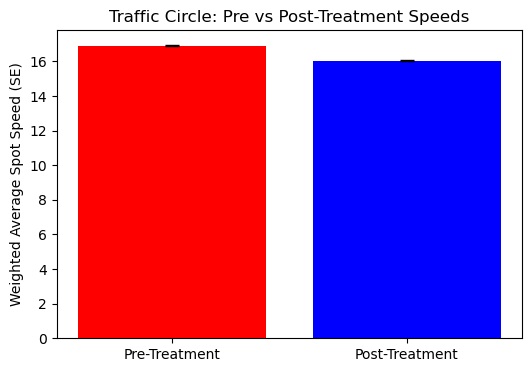

Highest value for pre-treatment'85th Speed Percentile': 32.0 mph Highest value for post-treatment'85th Speed Percentile': 31.0 mph
Highest value for pre-treatment'95th Speed Percentile': 68.0 mph Highest value for post-treatment'95th Speed Percentile': 81.0 mph
Row details:
Data Periods                                          Jun 01, 2021 - Jun 01, 2022
Mode of Travel                             All Vehicles - StL All Vehicles Volume
Zone ID                                                                       NaN
Zone Name                                                        East 29th Street
Zone Is Pass-Through                                                          yes
Zone Direction (degrees)                                                      270
Zone is Bi-Direction                                                          yes
Year-Month                                                                2022-05
Day Type                                                      6: Satu

,Data Periods,Mode of Travel,Zone ID,Zone Name,Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,Day Part,Average Daily Spot Traffic (StL Volume),Avg Spot Speed (mph),Free Flow Speed (mph),Free Flow Factor,5th Speed Percentile,15th Speed Percentile,85th Speed Percentile,95th Speed Percentile
1766,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,West 29th Street,yes,270,yes,2021-06,6: Saturday (Sa-Sa),2: Peak AM (6am-10am),66,21.0,24.387,0.858,12.0,14.0,24.0,68.0
527,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,East 29th Street,yes,270,yes,2022-04,7: Sunday (Su-Su),5: Late PM (7pm-12am),67,19.0,22.261,0.859,6.0,14.0,26.0,59.0
71,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,East 29th Street,yes,270,yes,2021-07,3: Wednesday (W-W),5: Late PM (7pm-12am),82,22.0,28.133,0.772,13.0,18.0,26.0,52.0
955,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Cimarron Street,yes,180,yes,2022-01,7: Sunday (Su-Su),1: Early AM (12am-6am),33,17.0,37.251,0.465,12.0,13.0,23.0,39.0
17,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,East 29th Street,yes,270,yes,2021-06,2: Tuesday (Tu-Tu),5: Late PM (7pm-12am),74,20.0,31.858,0.629,3.0,13.0,25.0,38.0
1111,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Cimarron Street,yes,180,yes,2022-05,1: Monday (M-M),1: Early AM (12am-6am),41,20.0,25.526,0.773,13.0,14.0,23.0,35.0
573,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,East 29th Street,yes,270,yes,2022-05,7: Sunday (Su-Su),3: Mid-Day (10am-3pm),94,20.0,23.463,0.866,5.0,12.0,25.0,34.0
1471,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Cimarron Street,yes,180,yes,2021-12,5: Friday (F-F),1: Early AM (12am-6am),33,18.0,21.943,0.826,14.0,14.0,25.0,33.0
895,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Cimarron Street,yes,180,yes,2021-12,5: Friday (F-F),1: Early AM (12am-6am),46,18.0,22.446,0.813,4.0,14.0,31.0,33.0
1867,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,West 29th Street,yes,270,yes,2021-08,7: Sunday (Su-Su),1: Early AM (12am-6am),38,16.0,23.493,0.696,4.0,6.0,23.0,33.0


In [4]:
pre_filters = (pre_treatment['Day Type'] == '0: All Days (M-Su)') | (pre_treatment['Day Part'] == '0: All Day (12am-12am)')
post_filters = (post_treatment['Day Type'] == '0: All Days (M-Su)') | (post_treatment['Day Part'] == '0: All Day (12am-12am)')

pre_treatment = pre_treatment[~pre_filters]
post_treatment = post_treatment[~post_filters]

#def filter_outliers(df, column, threshold=3):
    #valid_values = df[column].dropna()
    #z_scores = stats.zscore(valid_values)
    #valid_indices = valid_values.index[np.abs(z_scores) < threshold]
    #return df.loc[valid_indices]

#pre_treatment_filtered = filter_outliers(pre_treatment, '95th Speed Percentile')
#post_treatment_filtered = filter_outliers(post_treatment, '95th Speed Percentile')

#print("Pre-treatment data size before filtering:", pre_treatment.shape)
#print("Pre-treatment data size after filtering:", pre_treatment_filtered.shape)
#print("Post-treatment data size before filtering:", post_treatment.shape)
#print("Post-treatment data size after filtering:", post_treatment_filtered.shape)

pre_speeds = pre_treatment['Avg Spot Speed (mph)']
post_speeds = post_treatment['Avg Spot Speed (mph)']
pre_volume = pre_treatment['Average Daily Spot Traffic (StL Volume)']
post_volume = post_treatment['Average Daily Spot Traffic (StL Volume)']

pre_weighted_speed = (pre_speeds * pre_volume).sum() / pre_volume.sum()
post_weighted_speed = (post_speeds * post_volume).sum() / post_volume.sum()

def weighted_std(values, weights):
    mean = (values * weights).sum() / weights.sum()
    variance = (weights * (values - mean) ** 2).sum() / weights.sum()
    return variance ** 0.5

pre_weighted_std = weighted_std(pre_speeds, pre_volume)
post_weighted_std = weighted_std(post_speeds, post_volume)
pre_weighted_se = weighted_std(pre_speeds, pre_volume) / (len(pre_speeds) ** 0.5)
post_weighted_se = weighted_std(post_speeds, post_volume) / (len(post_speeds) ** 0.5)

valid_indices = pre_speeds.notna() & post_speeds.notna()
t_stat, p_value = stats.ttest_rel(pre_speeds[valid_indices], post_speeds[valid_indices])

print(f"Weighted Pre-Treatment Speed: {pre_weighted_speed:.2f} mph")
print(f"Weighted Post-Treatment Speed: {post_weighted_speed:.2f} mph")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

bar_colors = ['red', 'blue']
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_std, post_weighted_std], capsize=5, color=bar_colors)
plt.ylabel('Weighted Average Spot Speed (SD)')
plt.title('Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_se, post_weighted_se], capsize=5, color=bar_colors)

plt.ylabel('Weighted Average Spot Speed (SE)')
plt.title('Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()

max_85th_speed_row_pre = pre_treatment.loc[pre_treatment['85th Speed Percentile'].idxmax()]
max_85th_speed_row_post = post_treatment.loc[post_treatment['85th Speed Percentile'].idxmax()]

max_85th_speed_value_pre = max_85th_speed_row_pre['85th Speed Percentile']
max_85th_speed_value_post = max_85th_speed_row_post['85th Speed Percentile']

print(f"Highest value for pre-treatment'85th Speed Percentile': {max_85th_speed_value_pre} mph",
     f"Highest value for post-treatment'85th Speed Percentile': {max_85th_speed_value_post} mph")

max_95th_speed_row_pre = pre_treatment.loc[pre_treatment['95th Speed Percentile'].idxmax()]
max_95th_speed_row_post = post_treatment.loc[post_treatment['95th Speed Percentile'].idxmax()]

max_95th_speed_value_pre = max_95th_speed_row_pre['95th Speed Percentile']
max_95th_speed_value_post = max_95th_speed_row_post['95th Speed Percentile']

print(f"Highest value for pre-treatment'95th Speed Percentile': {max_95th_speed_value_pre} mph",
     f"Highest value for post-treatment'95th Speed Percentile': {max_95th_speed_value_post} mph")
print("Row details:")
print(max_85th_speed_row_pre,max_85th_speed_row_post )
top_speed = pre_treatment.sort_values('95th Speed Percentile', ascending = False).head(10)
top_speed

In [5]:
pre_weighted_85th_speed = (pre_treatment['85th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_85th_speed = (post_treatment['85th Speed Percentile'] * post_volume).sum() / post_volume.sum()

pre_weighted_95th_speed = (pre_treatment['95th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_95th_speed = (post_treatment['95th Speed Percentile'] * post_volume).sum() / post_volume.sum()

print(f"Weighted Pre-Treatment 85th Speed Percentile: {pre_weighted_85th_speed:.2f} mph")
print(f"Weighted Post-Treatment 85th Speed Percentile: {post_weighted_85th_speed:.2f} mph")
print(f"Weighted Pre-Treatment 95th Speed Percentile: {pre_weighted_95th_speed:.2f} mph")
print(f"Weighted Post-Treatment 95th Speed Percentile: {post_weighted_95th_speed:.2f} mph")


Weighted Pre-Treatment 85th Speed Percentile: 20.71 mph
Weighted Post-Treatment 85th Speed Percentile: 19.97 mph
Weighted Pre-Treatment 95th Speed Percentile: 23.55 mph
Weighted Post-Treatment 95th Speed Percentile: 22.74 mph


In [6]:
filtered_pre = pre_treatment[pre_treatment['Day Type'] != '0: All Days (M-Su)']
filtered_post = post_treatment[post_treatment['Day Type'] != '0: All Days (M-Su)']

total_pre_volume = filtered_pre['Average Daily Spot Traffic (StL Volume)'].sum()
total_post_volume = filtered_post['Average Daily Spot Traffic (StL Volume)'].sum()

total_combined_volume = total_pre_volume + total_post_volume

print(f"Total Pre-Treatment Volume: {total_pre_volume:,.0f}")
print(f"Total Post-Treatment Volume: {total_post_volume:,.0f}")
print(f"Combined Volume (Pre + Post): {total_combined_volume:,.0f}")


Total Pre-Treatment Volume: 315,793
Total Post-Treatment Volume: 318,946
Combined Volume (Pre + Post): 634,739


In [9]:
results = {
    'Intersection': 'Cimarron St & 29th St',
    'Pre_Mean': float(pre_weighted_speed),
    'Post_Mean': float(post_weighted_speed),
    'Pre_Std': float(pre_weighted_std),
    'Post_Std': float(post_weighted_std),
    'Pre_SE': float(pre_weighted_se),
    'Post_SE': float(post_weighted_se),
    'Pre_85th': float(pre_weighted_85th_speed),
    'Post_85th': float(post_weighted_85th_speed),
    'Pre_95th': float(pre_weighted_95th_speed),
    'Post_95th': float(post_weighted_95th_speed),
    'Pre_Max_85th': float(max_85th_speed_value_pre),
    'Post_Max_85th': float(max_85th_speed_value_post),
    'T_Statistic': float(t_stat),
    'P_Value': float(p_value),
    'Pre_Volume': int(total_pre_volume),
    'Post_Volume': int(total_post_volume),
    'Combined Volume': int(total_combined_volume),
    'Pre_Treatment_Volume': int(total_pre_volume),
    'Post_Treatment_Volume': int(total_post_volume),
    'Combined_Volumne': int(total_combined_volume)
}
import json
with open('../results/Cimarron St & 29th St_summary.json', 'w') as f:
    json.dump(results, f)